### Gradient Boosting Tree

1. Importar las librerías

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import xgboost as xgb 
from xgboost import XGBClassifier

2. Generamos datos sintéticos 

In [16]:
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# Creamos el dataframe a partir de los dos conjuntos de datos
df = pd.DataFrame(X, columns=["f1", "f2"])
df["objetivo"] = y
df.head(), df.shape

(         f1        f2  objetivo
 0 -1.164368  0.000143         0
 1  0.990782  0.456012         0
 2  0.810246  0.469638         0
 3  1.033873 -0.231900         1
 4  0.128899  0.139058         1,
 (200, 3))

3. Entrenamiento con Gradient Boosting para 10, 50, 100 y 1000 estimadores

GBT con 10 estimadores: Exactitud 0.980


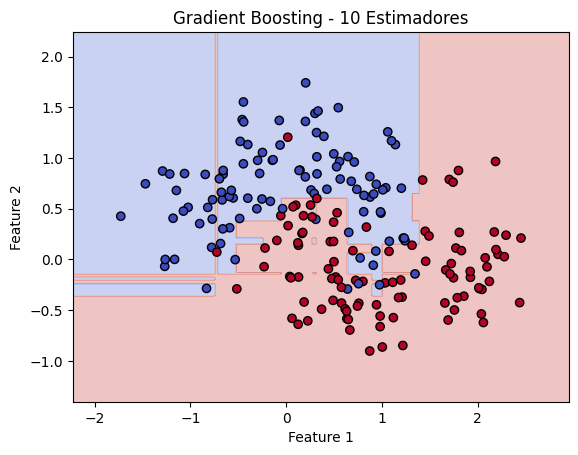

GBT con 50 estimadores: Exactitud 1.000


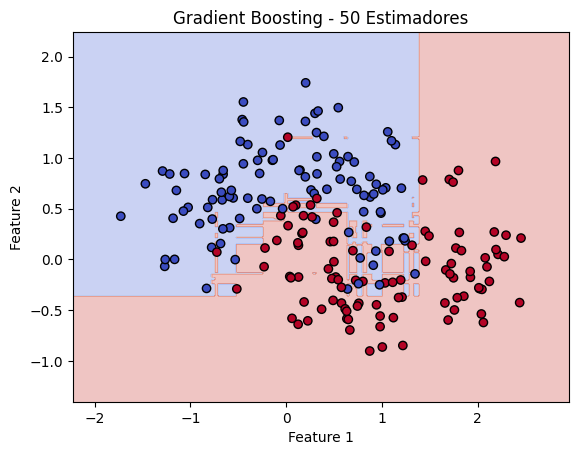

GBT con 100 estimadores: Exactitud 1.000


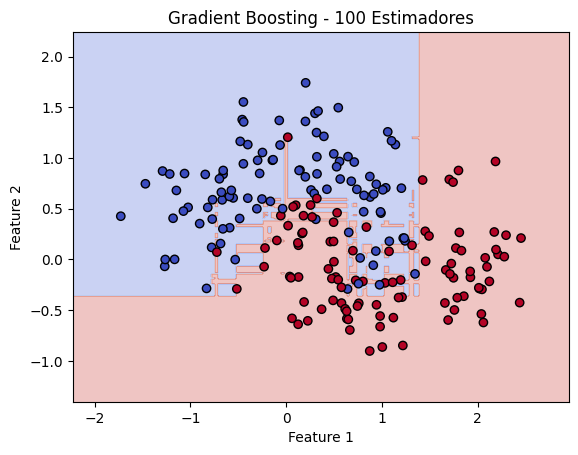

GBT con 1000 estimadores: Exactitud 1.000


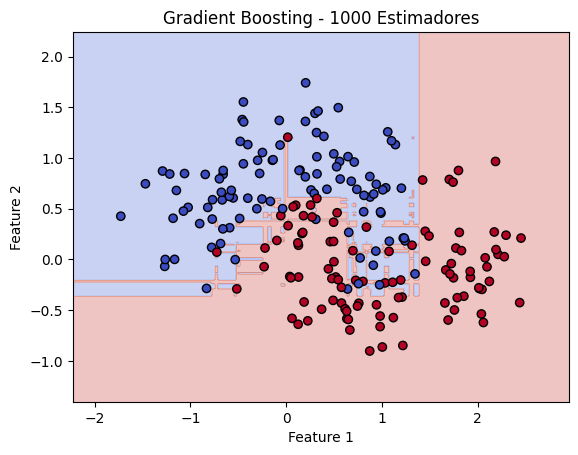

In [20]:
lista_estimadores = [10, 50, 100, 1000]

for estimador in lista_estimadores:
    
    # Creamos el modelo
    gbt = GradientBoostingClassifier(
        n_estimators= estimador,
        learning_rate=1,
        max_depth= 2,
        random_state= 42,
           
    )
    
    # Entrenamos el modelo
    gbt.fit(X, y)
    
    # Obtenemos las predicciones
    y_pred = gbt.predict(X)
    
    # Evaluamos el modelo
    acc = accuracy_score(y, y_pred)
    
    print(f"GBT con {estimador} estimadores: Exactitud {acc:.3f}")
    
    # Frontera de decisión
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = gbt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficamos la frontera y los datos originales
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(f"Gradient Boosting - {estimador} Estimadores")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    
    
    

4. XGBoost

GBT con 10 estimadores: Exactitud 0.890


c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


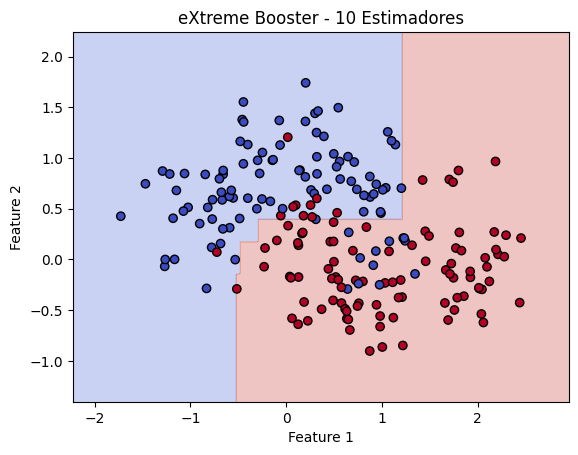

c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GBT con 50 estimadores: Exactitud 0.950


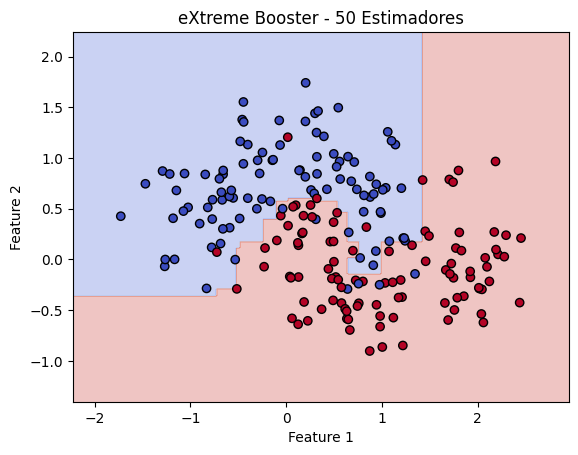

c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GBT con 100 estimadores: Exactitud 0.970


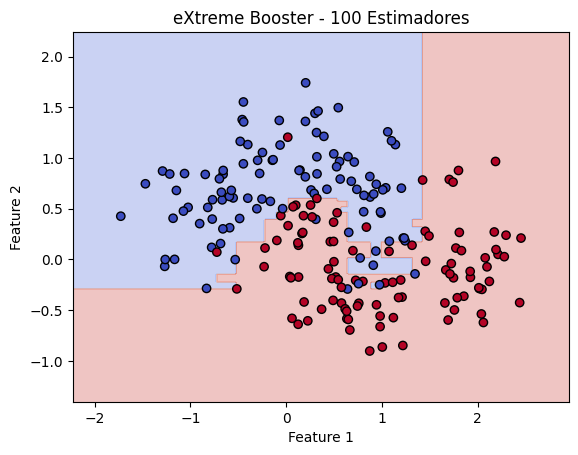

c:\Users\IABD12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GBT con 1000 estimadores: Exactitud 1.000


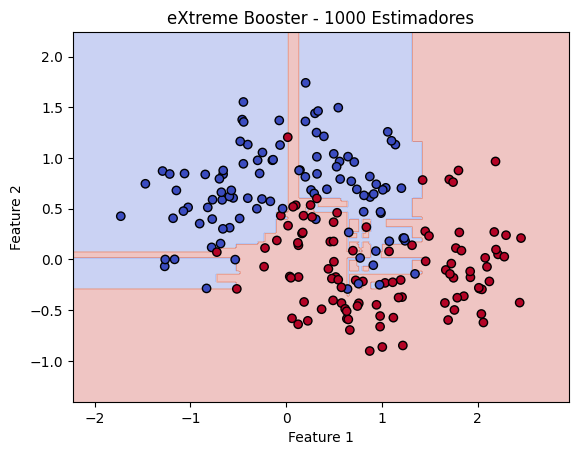

In [21]:
lista_estimadores = [10, 50, 100, 1000]

for estimador in lista_estimadores:
    
    # Creamos el modelo
    xgb = XGBClassifier(
        n_estimators= estimador,
        learning_rate=0.2,
        max_depth= 2,
        random_state= 42,
        use_label_encoder = False
           
    )
    
    # Entrenamos el modelo
    xgb.fit(X, y)
    
    # Obtenemos las predicciones
    y_pred = xgb.predict(X)
    
    # Evaluamos el modelo
    acc = accuracy_score(y, y_pred)
    
    print(f"GBT con {estimador} estimadores: Exactitud {acc:.3f}")
    
    # Frontera de decisión
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = xgb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficamos la frontera y los datos originales
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(f"eXtreme Booster - {estimador} Estimadores")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    
    
    